# Offshore wind farms

- <https://data.gov.ie/dataset/wind-farms-foreshore-process>
- <https://data-housinggovie.opendata.arcgis.com/maps/housinggovie::wind-farms-foreshore-process>

In [1]:
import os
from zipfile import ZipFile

import cartopy.crs as ccrs
import contextily as cx
import geopandas as gpd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter
from matplotlib_scalebar.scalebar import ScaleBar

from h2ss import data as rd

In [2]:
# base data download directory
DATA_DIR = os.path.join("data", "wind-farms")

URL = (
    "https://opendata.arcgis.com/api/v3/datasets/"
    "803a4ecc22aa4cc09111072a0bbc4fac_2/downloads/"
    "data?format=shp&spatialRefId=4326&where=1%3D1"
)

FILE_NAME = "wind-farms-foreshore-process.zip"

DATA_FILE = os.path.join(DATA_DIR, FILE_NAME)

# basemap cache directory
cx.set_cache_dir(os.path.join("data", "basemaps"))

In [23]:
plt.rcParams["xtick.major.size"] = 0
plt.rcParams["ytick.major.size"] = 0
plt.rcParams["xtick.minor.size"] = 0
plt.rcParams["ytick.minor.size"] = 0

In [3]:
rd.download_data(url=URL, data_dir=DATA_DIR, file_name=FILE_NAME)

Data 'wind-farms-foreshore-process.zip' already exists in 'data/wind-farms'.
Data downloaded on: 2023-09-11 14:08:54.610561+00:00
Download URL: https://opendata.arcgis.com/api/v3/datasets/803a4ecc22aa4cc09111072a0bbc4fac_2/downloads/data?format=shp&spatialRefId=4326&where=1%3D1
SHA256 hash: eb0f0c1b14a0db959b47795a623d0e8b74bfb32285656905ae30136a4e34446b



In [4]:
ZipFile(DATA_FILE).namelist()

['Energy_Offshore_Renewable.shp',
 'Energy_Offshore_Renewable.shx',
 'Energy_Offshore_Renewable.dbf',
 'Energy_Offshore_Renewable.cpg',
 'Energy_Offshore_Renewable.prj',
 'Energy_Offshore_Renewable.xml']

In [5]:
wind_farms = rd.read_shapefile_from_zip(data_path=os.path.join(DATA_FILE))

In [6]:
wind_farms.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
wind_farms.shape

(19, 23)

In [8]:
wind_farms.columns

Index(['OBJECTID', 'Name', 'Type', 'MDM_Catego', 'NMPF_Chapt', 'NMPF_Cha_1',
       'Map_Featur', 'Map_Data_S', 'Last_Updat', 'Policy01_N', 'Policy02_N',
       'Policy03_N', 'Owning_Org', 'Metadata_L', 'Policy01_P', 'Policy01_C',
       'Policy02_P', 'Policy02_C', 'Policy03_P', 'Policy03_C', 'Shape__Are',
       'Shape__Len', 'geometry'],
      dtype='object')

In [7]:
wind_farms[["Name", "Type", "MDM_Catego"]]

,Name,Type,MDM_Catego
0,Arklow Bank Phase 2,Fixed-Bottom,Site Investigations
1,Kilmichael Point\r\nKilmichael Point,Fixed-Bottom,Site Investigations
2,Codling Wind Park Extension,Fixed-Bottom,Relevant Projects
3,Codling Wind Park,Fixed-Bottom,Relevant Projects
4,Dublin Array,Fixed-Bottom,Relevant Projects
5,Oriel Wind Farm,Fixed-Bottom,Relevant Projects
6,Clogher Head,Fixed-Bottom,Site Investigations
7,North Irish Sea Array (NISA),Fixed-Bottom,Relevant Projects
8,Sceirde (Skerd) Rocks,Fixed-Bottom,Relevant Projects
9,Arklow Bank Phase I,Fixed-Bottom,Fully Commissioned


In [9]:
# minor name fix
wind_farms.at[1, "Name"] = "Kilmichael Point"

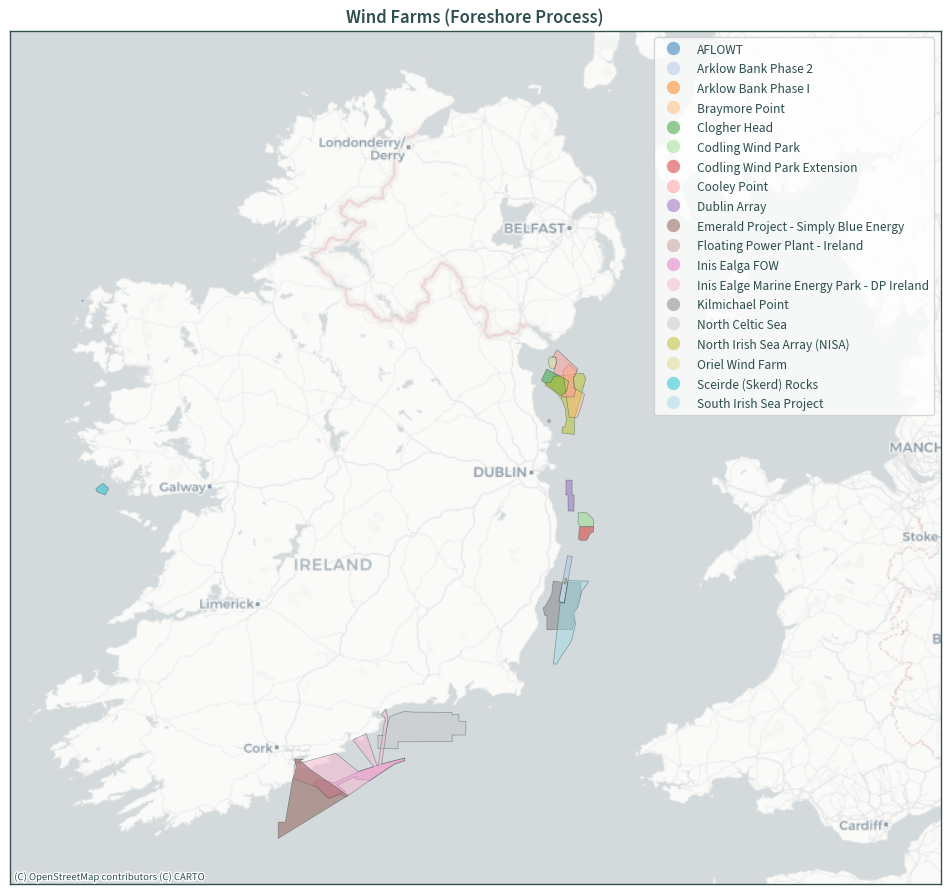

In [5]:
ax = wind_farms.to_crs(3857).plot(
    column="Name",
    cmap="tab20",
    alpha=0.5,
    figsize=(10, 10),
    legend=True,
    legend_kwds={"loc": "upper right"},
    linewidth=0.5,
    edgecolor="darkslategrey",
)
plt.xlim(-1.2e6, -0.3e6)
plt.ylim(6.65e6, 7.475e6)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, zoom=7)

plt.title("Wind Farms (Foreshore Process)")

plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

In [10]:
# read Kish Basin data
DATA_DIR = os.path.join("data", "kish-basin")

ds, extent = rd.read_dat_file(dat_path=DATA_DIR)

# use extent bounds
xmin, ymin, xmax, ymax = extent.total_bounds

In [11]:
# shape of the halite
shape = rd.halite_shape(dat_xr=ds)

In [12]:
# wind farms in the Irish Sea
wind_farms_ = wind_farms.sjoin(
    gpd.GeoDataFrame(geometry=extent.buffer(50000)).to_crs(wind_farms.crs)
)

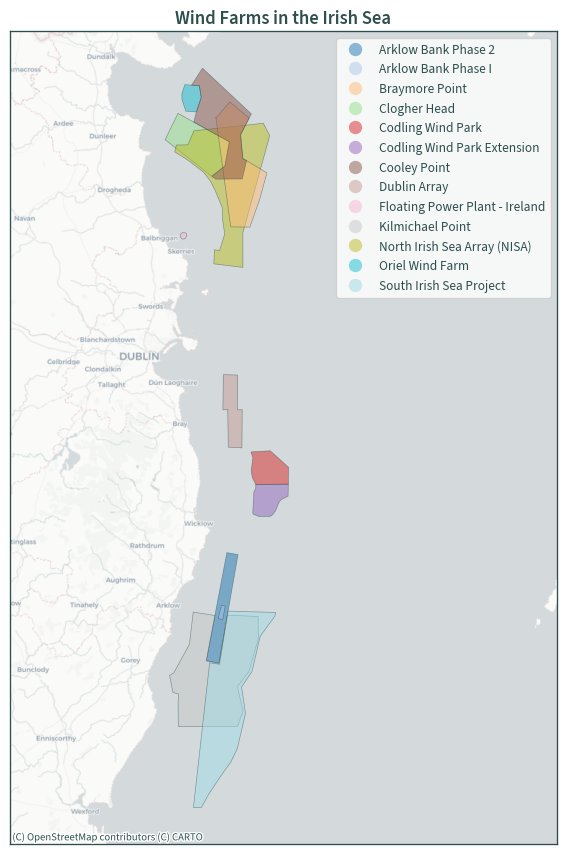

In [10]:
ax = wind_farms_.to_crs(3857).plot(
    column="Name",
    alpha=0.5,
    figsize=(9, 9),
    cmap="tab20",
    linewidth=0.5,
    edgecolor="darkslategrey",
    legend=True,
)
plt.xlim(-7.5e5, -5.25e5)
extent.to_crs(3857).boundary.plot(ax=ax, alpha=0)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

plt.title("Wind Farms in the Irish Sea")
plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

In [13]:
# wind farms near Kish Basin
wind_farms_ = (
    wind_farms.sjoin(
        gpd.GeoDataFrame(geometry=extent.buffer(3000)).to_crs(wind_farms.crs)
    )
    .reset_index()
    .sort_values("Name")
)

In [14]:
# combine Codling wind farm polygons
wind_farms_["Name_"] = wind_farms_["Name"].str.split(expand=True)[0]

In [19]:
wind_farms_ = wind_farms_.dissolve(by="Name_")

In [41]:
# remove abbreviation from name
wind_farms_.at["North", "Name"] = wind_farms_.at["North", "Name"].split(" (")[
    0
]

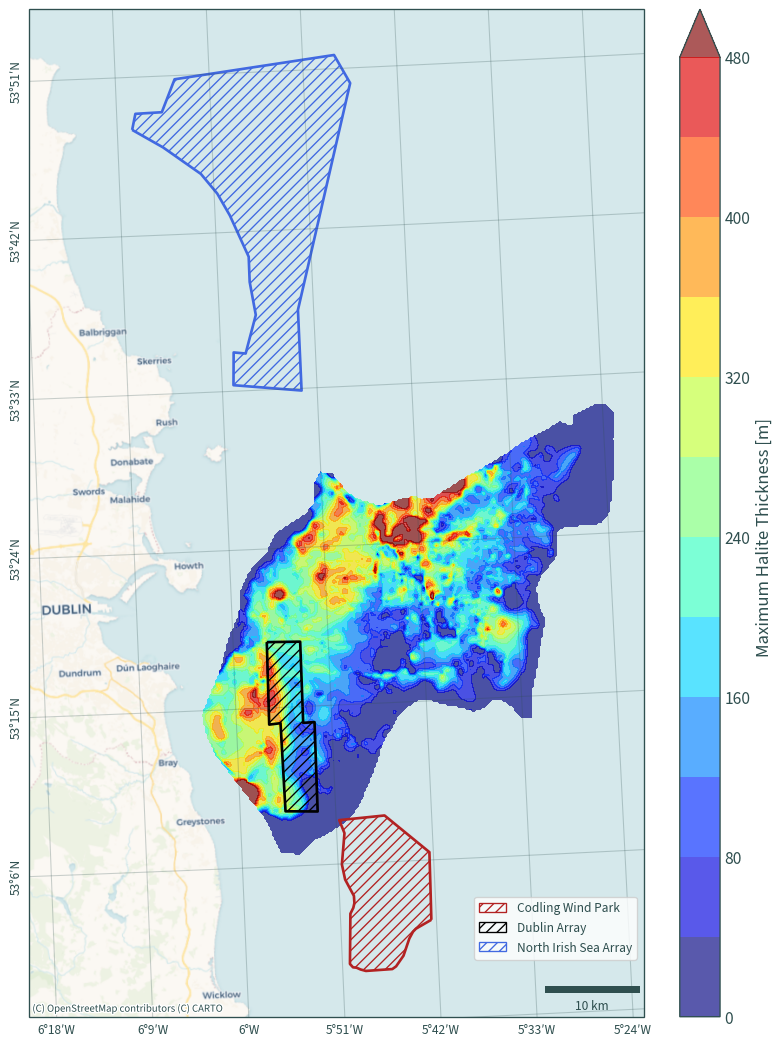

In [75]:
plt.figure(figsize=(11, 11))
ax = plt.axes(projection=ccrs.epsg(rd.CRS))

ds.max(dim="halite")["Thickness"].plot.contourf(
    cmap="jet",
    alpha=0.65,
    robust=True,
    levels=15,
    cbar_kwargs={
        "label": "Maximum Halite Thickness [m]",
        "aspect": 25,
        "pad": 0.035,
    },
)

plt.xlim(xmin - 8550, xmax + 1000)
# plt.ylim(ymin - 10500, ymax + 10500)

# wind farms
colours = ["firebrick", "black", "royalblue"]
legend_handles = []
for index, colour in zip(range(len(wind_farms_)), colours):
    wind_farms_.iloc[[index]].to_crs(rd.CRS).to_crs(rd.CRS).plot(
        ax=ax, hatch="///", facecolor="none", linewidth=2, edgecolor=colour
    )
    legend_handles.append(
        mpatches.Patch(
            facecolor="none",
            hatch="///",
            edgecolor=colour,
            label=wind_farms_.iloc[[index]]["Name"].values[0],
        )
    )

cx.add_basemap(ax, crs=rd.CRS, source=cx.providers.CartoDB.Voyager)
ax.gridlines(
    draw_labels={"bottom": "x", "left": "y"},
    alpha=0.25,
    color="darkslategrey",
    xformatter=LongitudeFormatter(auto_hide=False, dms=True),
    yformatter=LatitudeFormatter(auto_hide=False, dms=True),
    ylabel_style={"rotation": 90},
)
ax.add_artist(
    ScaleBar(
        1,
        box_alpha=0,
        location="lower right",
        color="darkslategrey",
        width_fraction=0.0075,
    )
)
ax.legend(handles=legend_handles, loc="lower right", bbox_to_anchor=(1, 0.05))

plt.title(None)
plt.tight_layout()
plt.show()

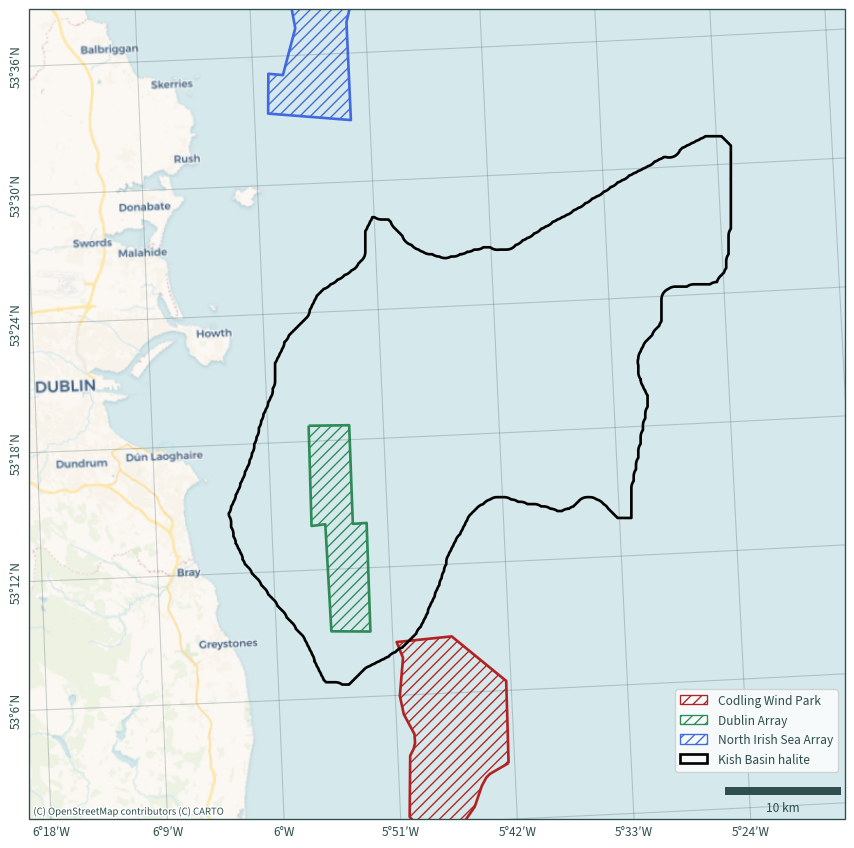

In [76]:
plt.figure(figsize=(9, 9))
ax = plt.axes(projection=ccrs.epsg(rd.CRS))

# add halite boundary - use buffering to smooth the outline
shape.buffer(1000).buffer(-1000).boundary.plot(
    ax=ax, color="black", linewidth=2
)

plt.xlim(xmin - 7750, xmax + 7750)
plt.ylim(ymin - 10500, ymax + 10500)

# wind farms
colours = ["firebrick", "seagreen", "royalblue"]
legend_handles = []
for index, colour in zip(range(len(wind_farms_)), colours):
    wind_farms_.iloc[[index]].to_crs(rd.CRS).to_crs(rd.CRS).plot(
        ax=ax, hatch="///", facecolor="none", linewidth=2, edgecolor=colour
    )
    legend_handles.append(
        mpatches.Patch(
            facecolor="none",
            hatch="///",
            edgecolor=colour,
            label=wind_farms_.iloc[[index]]["Name"].values[0],
        )
    )

legend_handles.append(
    mpatches.Patch(
        facecolor="none",
        edgecolor="black",
        label="Kish Basin halite",
        linewidth=2,
    )
)

cx.add_basemap(ax, crs=rd.CRS, source=cx.providers.CartoDB.Voyager, zoom=10)
ax.gridlines(
    draw_labels={"bottom": "x", "left": "y"},
    alpha=0.25,
    color="darkslategrey",
    xformatter=LongitudeFormatter(auto_hide=False, dms=True),
    yformatter=LatitudeFormatter(auto_hide=False, dms=True),
    ylabel_style={"rotation": 90},
)
ax.add_artist(
    ScaleBar(1, box_alpha=0, location="lower right", color="darkslategrey")
)
ax.legend(handles=legend_handles, loc="lower right", bbox_to_anchor=(1, 0.05))

plt.title(None)
plt.tight_layout()
plt.show()

In [77]:
# distance from Kish Bank
wind_farms_ = wind_farms_.dissolve("Name_").reset_index().to_crs(rd.CRS)

for i in range(len(wind_farms_)):
    print(
        wind_farms_.iloc[[i]]["Name"].values[0],
        "is",
        wind_farms_.iloc[[i]]
        .distance(shape["geometry"], align=False)
        .values[0],
        "m away from Kish Bank",
    )

Codling Wind Park is 0.0 m away from Kish Bank
Dublin Array is 0.0 m away from Kish Bank
North Irish Sea Array is 8598.299932603264 m away from Kish Bank
